# Analysis

In [63]:
# Importing all the model required

import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.mlab as mlab
import plotly.express as px
import seaborn as sb
import gensim as ge
#import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns

In [3]:
df=pd.read_excel('New_Interviewee_Case_Study_Dataset_FINAL__282_29.xlsx')

In [4]:
df.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,Over18,workingfromhome,BusinessTravel,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,complaintresolved,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31.0,Female,low,Research & Development,1.0,Y,0.0,Travel_Rarely,2.0,40.0,4.0,1.0,Y,0.0,11.0,1.0,1.0,1.0,0.0,No
1,32.0,Male,low,Research & Development,0.0,Y,0.0,Travel_Frequently,2.0,40.0,4.0,0.0,NaN,NaN,13.0,2.0,8.0,7.0,3.0,No
2,34.0,Female,medium,Research & Development,3.0,Y,1.0,Travel_Rarely,8.0,40.0,1.0,0.0,NaN,NaN,14.0,3.0,7.0,0.0,0.0,No
3,49.0,Male,high,Research & Development,4.0,Y,0.0,Travel_Rarely,1.0,40.0,3.0,0.0,NaN,NaN,14.0,3.0,23.0,8.0,0.0,No
4,27.0,Male,medium,Research & Development,1.0,Y,0.0,Travel_Rarely,19.0,40.0,1.0,0.0,NaN,NaN,11.0,1.0,7.0,7.0,0.0,No


In [5]:
df['Left'] = df['Left'].map({'Yes': 1, 'No': 0})
df['Left']

0       0
1       0
2       0
3       0
4       0
       ..
1469    0
1470    0
1471    0
1472    1
1473    0
Name: Left, Length: 1474, dtype: int64

In [6]:
turnover_rate = df['Left'].mean()
print(f'Turnover rate: {turnover_rate:.2%}')

Turnover rate: 16.35%


In [7]:
df['MonthlyIncome'] = df['MonthlyIncome'].map({'low': 0, 'medium': 1,'high':3})
df['MonthlyIncome']

0       0
1       0
2       1
3       3
4       1
       ..
1469    0
1470    0
1471    1
1472    0
1473    1
Name: MonthlyIncome, Length: 1474, dtype: int64

In [8]:
# Calculate the average monthly income for high-performing employees who stayed vs. those who left
high_performing_stay = df[(df['PerformanceRating'] == 4.0) & (df['Left'] == 'No')]['MonthlyIncome'].mean()
high_performing_leave = df[(df['PerformanceRating'] == 4.0) & (df['Left'] == 'Yes')]['MonthlyIncome'].mean()
print(f'Average monthly income for high-performing employees who stayed: {high_performing_stay:}')
print(f'Average monthly income for high-performing employees who left: {high_performing_leave:}')


Average monthly income for high-performing employees who stayed: nan
Average monthly income for high-performing employees who left: nan


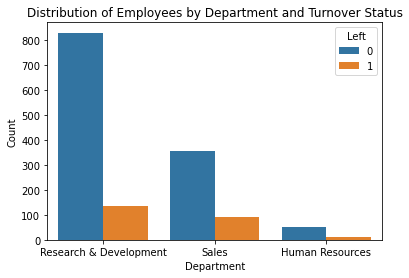

In [9]:
# Create a bar plot to visualize the distribution of employees by department and their turnover status
sns.countplot(x='Department', hue='Left', data=df)
plt.title('Distribution of Employees by Department and Turnover Status')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

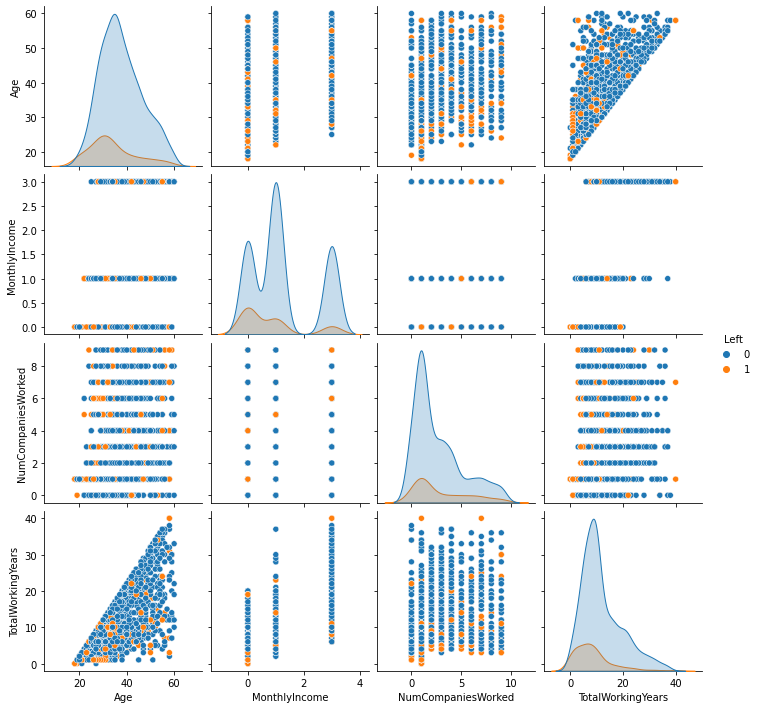

In [10]:
# Create a pair plot to visualize the relationships between different numerical variables
sns.pairplot(df, vars=['Age', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears'], hue='Left')
plt.show()

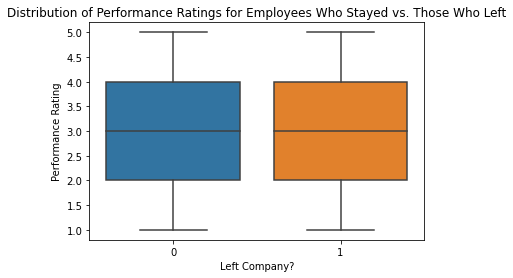

In [11]:
# Create a box plot to visualize the distribution of performance ratings for employees who stayed vs. those who left
sns.boxplot(x='Left', y='PerformanceRating', data=df)
plt.title('Distribution of Performance Ratings for Employees Who Stayed vs. Those Who Left')
plt.xlabel('Left Company?')
plt.ylabel('Performance Rating')
plt.show()

In [12]:
# Calculate the average satisfaction score for employees who have left and those who have stayed
left_employees_satisfaction = df[df['Left'] == 1]['JobSatisfaction'].mean()
stayed_employees_satisfaction = df[df['Left'] == 0]['JobSatisfaction'].mean()


In [13]:
# Print the average satisfaction scores
print(f"Average satisfaction score for employees who have left: {left_employees_satisfaction:.2f}")
print(f"Average satisfaction score for employees who have stayed: {stayed_employees_satisfaction:.2f}")


Average satisfaction score for employees who have left: 2.49
Average satisfaction score for employees who have stayed: 2.78


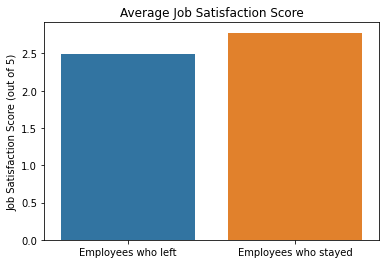

In [14]:
# Create a bar plot to compare the average satisfaction scores
fig, ax = plt.subplots()
sns.barplot(x=['Employees who left', 'Employees who stayed'], y=[left_employees_satisfaction, stayed_employees_satisfaction], ax=ax)
ax.set_title('Average Job Satisfaction Score')
ax.set_ylabel('Job Satisfaction Score (out of 5)')
plt.show()

In [15]:
# Calculate the average ratings for work environment and manager satisfaction for employees who have left and those who have stayed
left_employees_work_env_rating = df[df['Left'] == '1']['workingfromhome'].mean()
stayed_employees_work_env_rating = df[df['Left'] == '0']['workingfromhome'].mean()



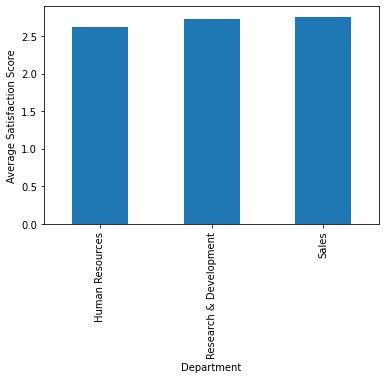

In [16]:
# Create a bar chart of average satisfaction score by department
dept_satisfaction = df.groupby('Department')['JobSatisfaction'].mean()
dept_satisfaction.plot(kind='bar', xlabel='Department', ylabel='Average Satisfaction Score')
plt.show()



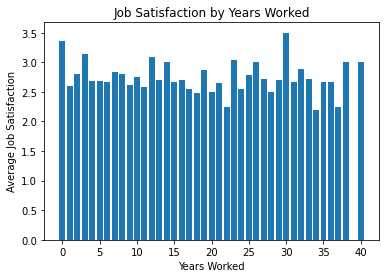

In [66]:
# Group the data by years worked and calculate the average job satisfaction for each group
satisfaction_by_years = df.groupby('TotalWorkingYears')['JobSatisfaction'].mean()

# Create a bar chart to visualize the data
plt.bar(satisfaction_by_years.index, satisfaction_by_years.values)
plt.xlabel('Years Worked')
plt.ylabel('Average Job Satisfaction')
plt.title('Job Satisfaction by Years Worked')
plt.show()

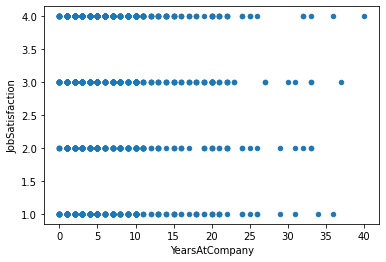

In [17]:
# Create a scatter plot of satisfaction vs. years at company
df.plot(kind='scatter', x='YearsAtCompany', y='JobSatisfaction')
plt.show()

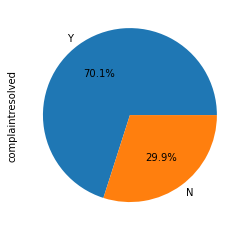

In [18]:
# Create a pie chart of reasons for employee complaints
complaints = df['complaintresolved'].value_counts()
complaints.plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [19]:
# Calculate the average job satisfaction of all employees
avg_job_satisfaction = df['JobSatisfaction'].mean()
print('Average job satisfaction: {:.2f}'.format(avg_job_satisfaction))


Average job satisfaction: 2.73


In [20]:
# Calculate the average job satisfaction by department
dept_job_satisfaction = df.groupby('Department')['JobSatisfaction'].mean()
print('Average job satisfaction by department:')
print(dept_job_satisfaction)

Average job satisfaction by department:
Department
Human Resources           2.625000
Research & Development    2.727934
Sales                     2.753915
Name: JobSatisfaction, dtype: float64


In [21]:
# Identify the top 5 factors that are correlated with high job satisfaction
corr_matrix = df.corr()
job_satisfaction_corr = corr_matrix['JobSatisfaction'].sort_values(ascending=False)
top_5_corr = job_satisfaction_corr[1:6]
print('Top 5 factors correlated with high job satisfaction:')
print(top_5_corr)

Top 5 factors correlated with high job satisfaction:
PerformanceRating    0.024618
PercentSalaryHike    0.018878
complaintfiled       0.006137
DistanceFromHome    -0.001953
Age                 -0.003346
Name: JobSatisfaction, dtype: float64


Text(0.5, 1.0, 'Job Satisfaction Levels')

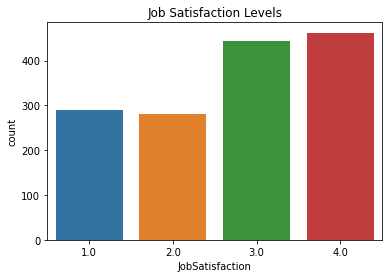

In [22]:
# Create a countplot of job satisfaction levels
sns.countplot(x="JobSatisfaction", data=df)
plt.title("Job Satisfaction Levels")


Text(0.5, 1.0, 'Monthly Income Distribution')

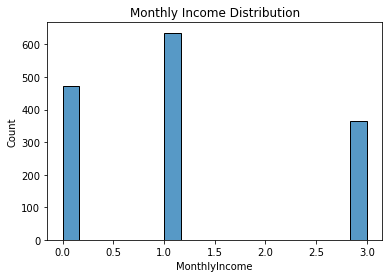

In [23]:
# Display a histogram of monthly income
sns.histplot(x="MonthlyIncome", data=df)
plt.title("Monthly Income Distribution")

Text(0.5, 1.0, 'Job Satisfaction by Department')

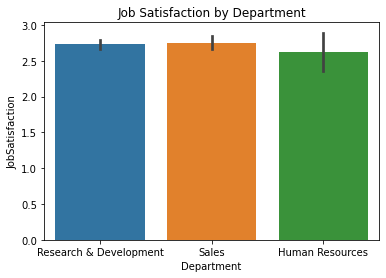

In [24]:
# Create a barplot of department vs. job satisfaction
sns.barplot(x="Department", y="JobSatisfaction", data=df)
plt.title("Job Satisfaction by Department")

Text(0.5, 1.0, 'Age vs. Total Working Years')

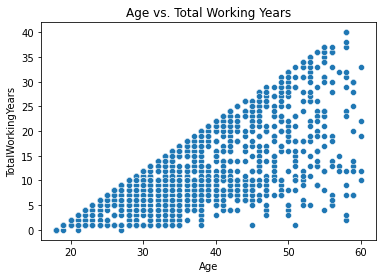

In [25]:
# Display a scatterplot of age vs. total working years
sns.scatterplot(x="Age", y="TotalWorkingYears", data=df)
plt.title("Age vs. Total Working Years")

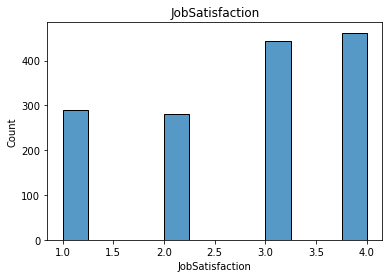

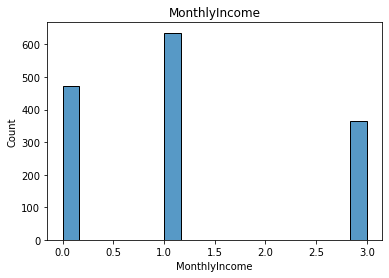

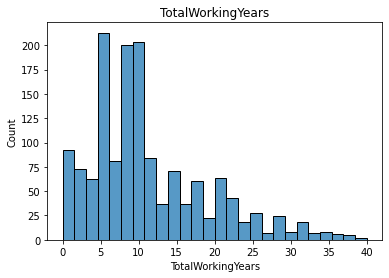

In [26]:
# Define the key metrics
key_metrics = ['JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears']

# Explore the distributions of the key metrics
for metric in key_metrics:
    sns.histplot(df[metric], kde=False)
    plt.title(metric)
    plt.show()

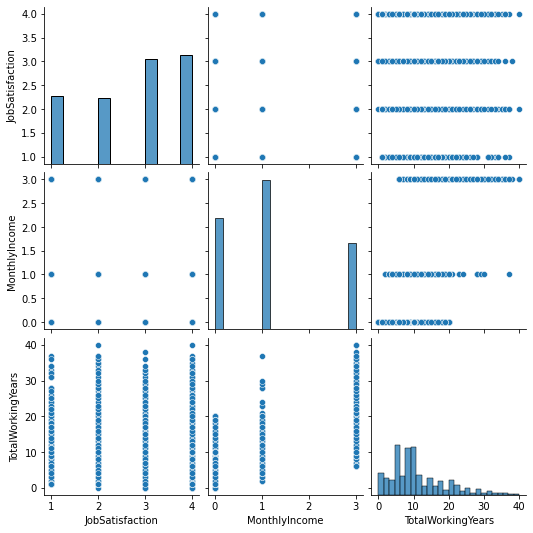

In [27]:
# Explore the correlations between the key metrics
sns.pairplot(df[key_metrics])
plt.show()

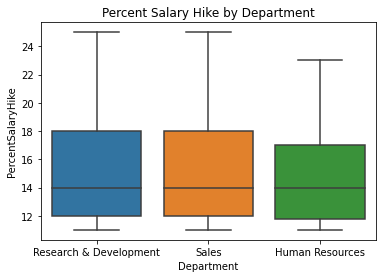

In [28]:
# Explore the percent salary hike by department
sns.boxplot(x='Department', y='PercentSalaryHike', data=df)
plt.title('Percent Salary Hike by Department')
plt.show()

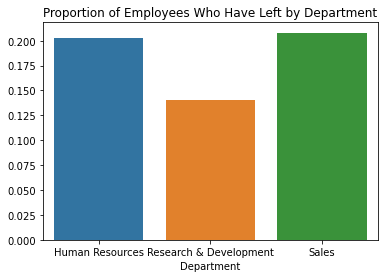

In [29]:
# Explore the proportion of employees who have left by department
df_left = df[df['Left'] == 1]
left_counts = df_left.groupby('Department')['Left'].count()
total_counts = df.groupby('Department')['Left'].count()
prop_left = left_counts / total_counts
sns.barplot(x=prop_left.index, y=prop_left.values)
plt.title('Proportion of Employees Who Have Left by Department')
plt.show()

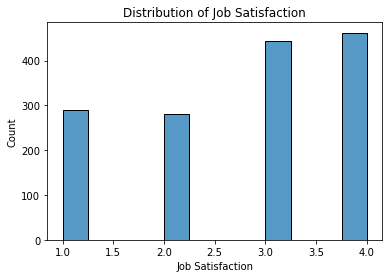

In [65]:
# Key metric 1: Job satisfaction
# Plot a histogram of job satisfaction
sns.histplot(data=df, x='JobSatisfaction')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()


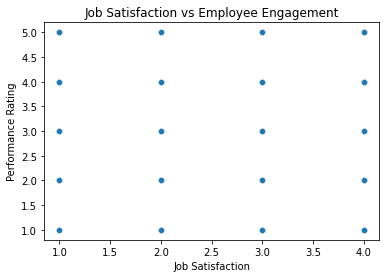

In [33]:
# Plot a scatterplot of job satisfaction and PerformanceRating
sns.scatterplot(data=df, x='JobSatisfaction', y='PerformanceRating')
plt.title('Job Satisfaction vs Employee Engagement')
plt.xlabel('Job Satisfaction')
plt.ylabel('Performance Rating')
plt.show()

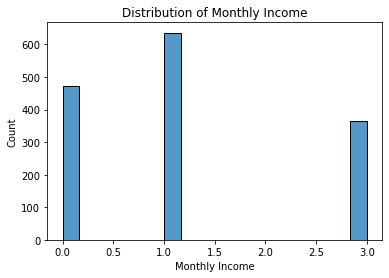

In [34]:
# Key metric 2: Monthly income
# Plot a histogram of monthly income
sns.histplot(data=df, x='MonthlyIncome')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

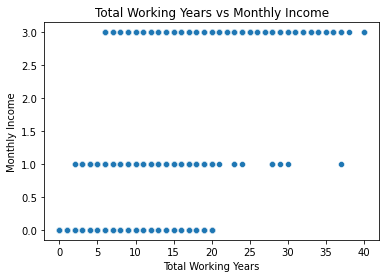

In [35]:
# Plot a scatterplot of monthly income and total working years
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')
plt.title('Total Working Years vs Monthly Income')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.show()

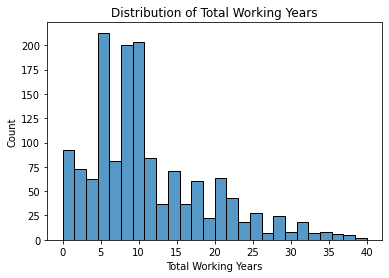

In [37]:
# Key metric 3: Total working years
# Plot a histogram of total working years
sns.histplot(data=df, x='TotalWorkingYears')
plt.title('Distribution of Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.show()

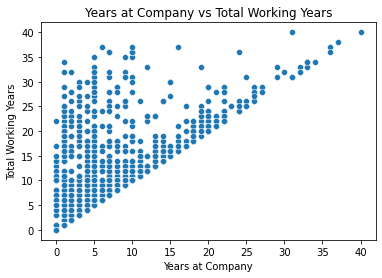

In [38]:
# Plot a scatterplot of total working years and years at company
sns.scatterplot(data=df, x='YearsAtCompany', y='TotalWorkingYears')
plt.title('Years at Company vs Total Working Years')
plt.xlabel('Years at Company')
plt.ylabel('Total Working Years')
plt.show()

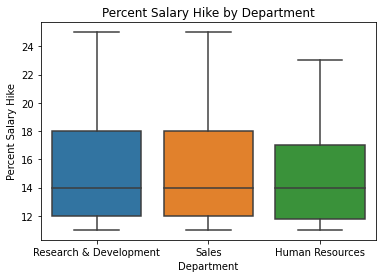

In [40]:
# Key metric 4: Percent salary hike by department
# Plot a boxplot of percent salary hike by department
sns.boxplot(data=df, x='Department', y='PercentSalaryHike')
plt.title('Percent Salary Hike by Department')
plt.xlabel('Department')
plt.ylabel('Percent Salary Hike')
plt.show()

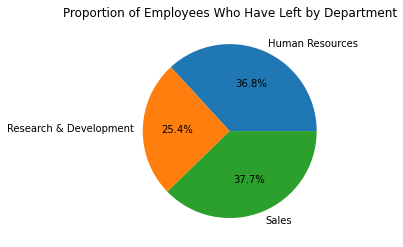

In [42]:
# Key metric 5: Left
# Plot a pie chart of the proportion of employees who have left by department
left_by_dept = df.groupby('Department')['Left'].mean()
left_by_dept.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employees Who Have Left by Department')
plt.ylabel('')
plt.show()

In [44]:
# Drop irrelevant columns
df.drop(['Over18', 'StandardHours', 'complaintfiled', 'complaintresolved', 'complaintyears'], axis=1, inplace=True)

In [45]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Gender', 'Department', 'BusinessTravel'])

In [46]:
# Split the data into training and testing sets
X = df.drop('Left', axis=1)
y = df['Left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [51]:
# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.8542372881355932
Confusion Matrix: [[246   3]
 [ 40   6]]


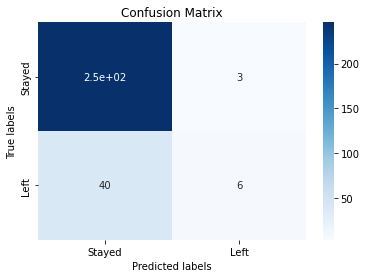

In [54]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Stayed', 'Left'])
ax.yaxis.set_ticklabels(['Stayed', 'Left'])
plt.show()


In [57]:
# Create the model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 85.76%


In [60]:
# Initialize SVM classifier with a linear kernel
svm = SVC(kernel="linear")

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8440677966101695


In [62]:
# Create the Naive Bayes Classifier model
model = GaussianNB()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7966101694915254


In [64]:

# Create a K-Nearest Neighbors Classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.8203389830508474
